In [5]:
%load_ext autoreload
%autoreload 2

from datasets import DataCifar10
from models import MultiLayerNet
from optimers import OptimerSGD, OptimerAdam
from tuners import ParamTuner
from utils import check_accuracy, check_gradient
from utils import show_training_infos

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load data
dataloader = DataCifar10('./datasets/cifar-10-batches-py', norm_dis_mean=True, norm_div_std=False,
                         num_val=1000, num_train=49000, num_test=1000)
    
print('Training data shape: ', dataloader.x_train.shape)
print('Training labels shape: ', dataloader.y_train.shape)
print('Validating data shape: ', dataloader.x_val.shape)
print('Validating labels shape: ', dataloader.y_val.shape)
print('Testing data shape: ', dataloader.x_test.shape)
print('Testing labels shape: ', dataloader.y_test.shape)

Training data shape:  (49000, 3, 32, 32)
Training labels shape:  (49000,)
Validating data shape:  (1000, 3, 32, 32)
Validating labels shape:  (1000,)
Testing data shape:  (1000, 3, 32, 32)
Testing labels shape:  (1000,)


In [7]:
def get_init_model(hyperparams):
    return MultiLayerNet(32 * 32 * 3, 10, hyperparams=hyperparams, seed=99)

# init model
model = get_init_model(hyperparams={'reg': 0.6, 'nums_hidden': [80], 'batchnorm': True})

# sanity check
loss = model.backward(dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])
print('Sanity check result:')
print('Init loss is', loss)

# gradient check
for i in range(3):
    print('\nGradient check result - ', i + 1, ':')
    check_gradient(model, dataloader.x_train[0: 200, :], dataloader.y_train[0: 200])

Sanity check result:
Init loss is 2.303440383213175

Gradient check result -  1 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
<class 'models.layers.layers.Linear'> W -0.0033428548151803734 -0.0033428619865219318 2.145272308429781e-06
<class 'models.layers.layers.Linear'> b 3.9859449074697295e-06 3.985960068648886e-06 3.8036527534168682e-06
<class 'models.layers.layers.BatchNorm'> gamma -2.7089441800853816e-08 -2.707734904349294e-08 0.00044650078663982214
<class 'models.layers.layers.BatchNorm'> beta 4.452571644719683e-06 4.452571430662583e-06 4.8074937744855404e-08
<class 'models.layers.layers.Linear'> W 0.02595556358730988 0.025955563605506025 7.010499275532661e-10
<class 'models.layers.layers.Linear'> b -0.009999994787790456 -0.009999994767965814 1.982465228074289e-09

Gradient check result -  2 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
<class 'models.layers.layers.Linear'> W 0.00040779963850212647 0.00040779345343667866 1.5

## Model with batch normalization
Compare the model with and withou batch normalization.

In [9]:
# train model
param_model = {'reg': 0.1, 'nums_hidden': [100, 50, 20], 'batchnorm': True}
param_optim = {'learn_rate': 1e-4, 'learn_rate_decay': 0.95, 'num_iters': 1000, 'batch_size': 200}

param_model['batchnorm'] = True
model_bn = get_init_model(param_model)
optimer_bn = OptimerAdam(hyperparams=param_optim)
optimer_bn.train(model_bn, dataloader)

param_model['batchnorm'] = False
model_no = get_init_model(param_model)
optimer_no = OptimerAdam(hyperparams=param_optim)
optimer_no.train(model_no, dataloader)


0 / 1000 loss is 2.302741425720558
100 / 1000 loss is 2.1355366235518907
200 / 1000 loss is 2.058813191848261
300 / 1000 loss is 2.067968634597232
400 / 1000 loss is 2.0021417836147117
500 / 1000 loss is 1.9276268067888649
600 / 1000 loss is 1.8854533633059734
700 / 1000 loss is 1.910261479507012
800 / 1000 loss is 1.8380074404921933
900 / 1000 loss is 1.8432688777638173
0 / 1000 loss is 2.3027412217106447
100 / 1000 loss is 2.3026772781543787
200 / 1000 loss is 2.302765303777315
300 / 1000 loss is 2.3025422597742518
400 / 1000 loss is 2.3029749074462154
500 / 1000 loss is 2.302564324009505
600 / 1000 loss is 2.302704006951165
700 / 1000 loss is 2.302502503159017
800 / 1000 loss is 2.3026319560597712
900 / 1000 loss is 2.3029472937391002


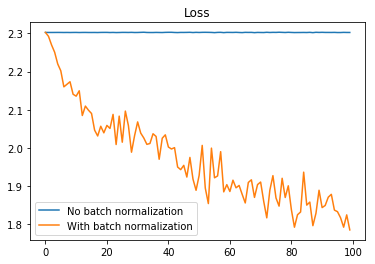

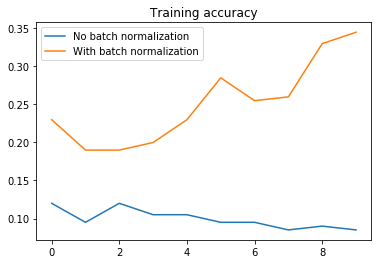

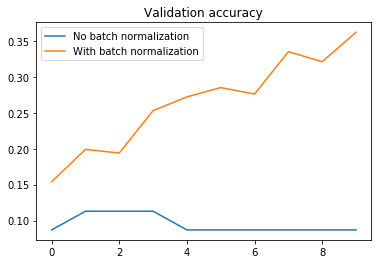

In [10]:
# plot loss curve
show_training_infos([optimer_no, optimer_bn], 
                    legends=['No batch normalization', 'With batch normalization'])

# Batch normalization and initial scale

In [6]:
# train model
param_model = {'reg': 0.1, 'nums_hidden': [100, 50, 20], 'batchnorm': True}
param_optim = {'learn_rate': 1e-4, 'learn_rate_decay': 0.95, 'num_iters': 2000, 'batch_size': 100}

param_model['init_scale'] = 1e-4
model_4 = get_init_model(param_model)
optimer_4 = OptimerAdam(param_optim)
optimer_4.train(model_4, dataloader)

param_model['init_scale'] = 1e-2
model_2 = get_init_model(param_model)
optimer_2 = OptimerAdam(param_optim)
optimer_2.train(model_2, dataloader)

param_model['init_scale'] = 1e-1
model_1 = get_init_model(param_model)
optimer_1 = OptimerAdam(param_optim)
optimer_1.train(model_1, dataloader)

0 / 2000 loss is 2.3027418042918484
100 / 2000 loss is 2.1255859622184343
200 / 2000 loss is 2.074343846492097
300 / 2000 loss is 2.1725233660047767
400 / 2000 loss is 2.03380754677555
500 / 2000 loss is 1.9942345172076212
600 / 2000 loss is 1.9625114559462464
700 / 2000 loss is 2.0910742684661567
800 / 2000 loss is 1.9109517149718922
900 / 2000 loss is 2.0787124348028434
1000 / 2000 loss is 1.9152319989724371
1100 / 2000 loss is 1.851416029032092
1200 / 2000 loss is 1.8510033612410988
1300 / 2000 loss is 1.8280932840678608
1400 / 2000 loss is 1.9928756803803394
1500 / 2000 loss is 1.8099702464506826
1600 / 2000 loss is 1.7740737858646536
1700 / 2000 loss is 1.7785805079450068
1800 / 2000 loss is 1.7506248896034478
1900 / 2000 loss is 1.6893023026274443
0 / 2000 loss is 3.8682499448604823
100 / 2000 loss is 2.1618633987029825
200 / 2000 loss is 2.014204117133902
300 / 2000 loss is 2.107044796099314
400 / 2000 loss is 1.9028600830003368
500 / 2000 loss is 1.7899981617444665
600 / 2000 l

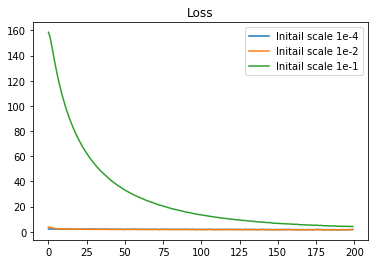

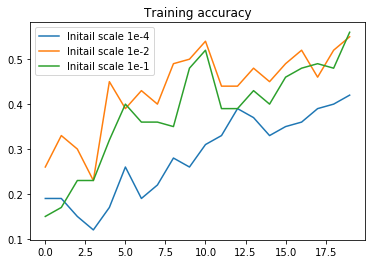

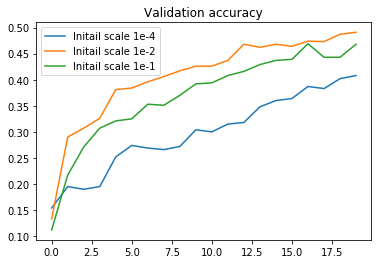

In [7]:
# plot loss curve
show_training_infos([optimer_4, optimer_2, optimer_1], 
                    legends=['Initail scale 1e-4', 'Initail scale 1e-2', 'Initail scale 1e-1'])